In [3]:
root = '../data/'

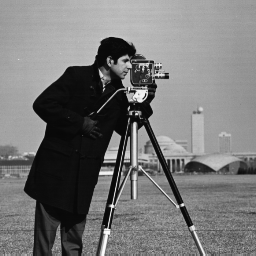

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # classe usada para abertura de imagens

img = Image.open(root + 'cameraman/cameraman.tiff')
img # objeto do tipo Image

In [6]:
img_array = np.array(img) # converte imagem para array 
img_array

array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

In [7]:
img_array.shape # 256 pixels de largura e 256 de altura, cada pixel com 0 (branco) a 255 (preto) 

(256, 256)

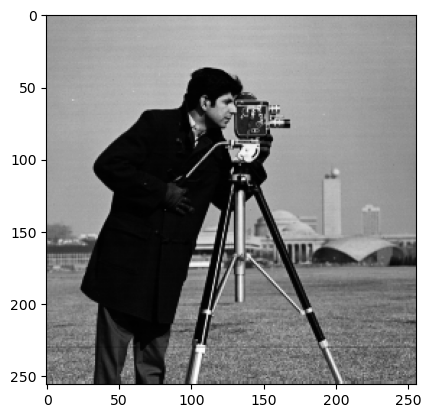

In [9]:
plt.imshow(img_array, cmap='gray') # plt.imshow mapeia valores para um mapa de cor
# gray indca que 0 eh preto, 155 cinza e 255 branco
# plt.imshow pega array e gera imagem correspondente considerando pixels

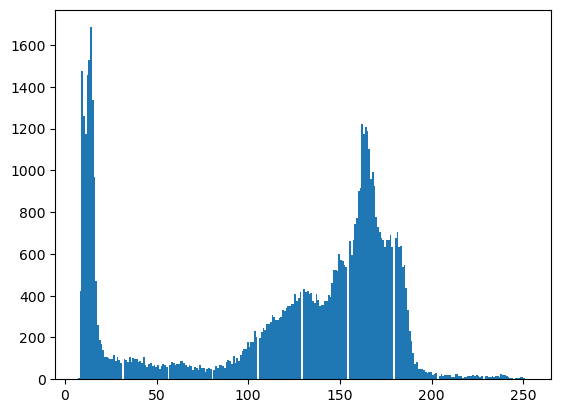

In [10]:
img_out = img_array.flatten() # metodo serve para transformar array multidimensional em uma dimensao 
# so para poder obter histrograma que indica "quantidade" de cores

_ = plt.hist(img_out, bins=256) # bins indica numero de colunas

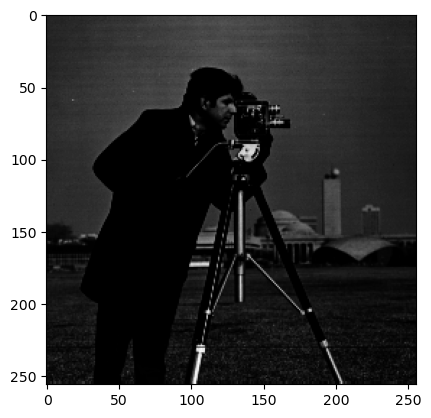

In [12]:
# ponto eh usado para fazer transformacao para float, uma vez que uint8 consegue apenas armazenar de 0 
# a 255
img_transformada = img_array ** 4. # pega cada pixel e eleva a quatro (broadcasting)

#outra opcao: img_transformada = img_array.astype(float) ** 4

plt.imshow(img_transformada, 'gray')

# imagem fica mais escura pois maioria dos pixels eh mapeada para valores mais altos proximos do preto,
# enquanto minoria fica perto do branco (escala eh mudada, pensar no grafico f(x) = x**4)

In [13]:
img_transformada.dtype # maneira de identificar tipo

dtype('float64')

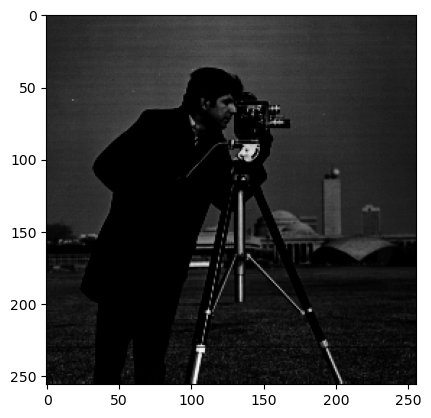

In [17]:
# para normalizar de volta para 0 a 255 
img_transf_normalizada = (255*(img_transformada - img_transformada.min())/img_transformada.max()).astype(np.uint8)


_ = plt.imshow(img_transf_normalizada, 'gray')

# notar que imagem continua com a mesma coloracao, pois informacao continou a mesma, so mudou a escala 

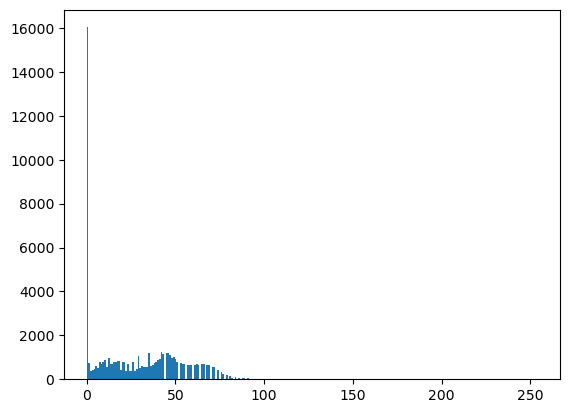

In [18]:
_ = plt.hist(img_transf_normalizada.flatten(), 256)

In [19]:
# sobre o formato de imagens

# tiff eh formato + antigo e + abrangente, pode salvar imagens 3D e metadados, geralmente usado p/
# imagens medicas

# jpeg tem compressao muito agressiva que perde dados e gera artefato nas bordas, gerando arquivos
# de tamanho menores

# png comprime mas evita perdas


def info(img):
    img = np.array(img)
    print('tipo', img.dtype)
    print('shape', img.shape)
    print('\n')

img_tiff = Image.open(root + 'cameraman/cameraman2.tiff')
img_tiff2 = Image.open(root + 'cameraman/cameraman3.tiff')


# cameraman2.tiff tem terceira dimensao com 3 canais (rgb, pois eh imagem colorida)
info(img_tiff)

# cameraman3.tiff tem terceira dimensao com 4 canais (rgb mais uma que indica transparencia)
info(img_tiff2)

tipo uint8
shape (256, 256, 3)


tipo uint8
shape (256, 256, 4)


